In [1]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
from math import sin as sine
sin=np.vectorize(sine)
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt

Welcome to JupyROOT 6.24/06


In [2]:
file = ROOT.TFile.Open("run3BtoM_4hcopy_ratioFR_percalo_cov_mat_1.root")
hist_tmp = ROOT.TH1D()
hist_tmp = file.Get("hcalo_ratio_1")

In [3]:
fit_start=30000
fit_stop=300000
fit_range=hist_tmp.FindBin(fit_stop)-hist_tmp.FindBin(fit_start)+1
y_val=np.empty(shape=(24,fit_range))
y_err=np.empty(shape=(24,fit_range))
x_val=np.empty(shape=(24,fit_range))
y_cov=np.empty(shape=(24,fit_range,fit_range))  

In [4]:
%%time
for icalo in range(0,24):
    hist = ROOT.TH1D()
    hcov = ROOT.TH2D()
    hist = file.Get("hcalo_ratio_"+str(icalo+1))
    for ibin in range (0,fit_range):
        y_val[icalo][ibin]=hist.GetBinContent(ibin+hist.FindBin(fit_start))
        y_err[icalo][ibin]=hist.GetBinError(ibin+hist.FindBin(fit_start))
        x_val[icalo][ibin]=hist.GetBinCenter(ibin+hist.FindBin(fit_start))
        
    hcov = file.Get("hcov_"+str(icalo+1))
    for irow in range (0, fit_range):
        for icol in range(0, fit_range):
            y_cov[icalo][irow][icol]=hcov.GetBinContent(irow+hist.FindBin(fit_start),icol+hist.FindBin(fit_start))
            
    hist.Reset()
    hcov.Reset()

CPU times: user 2min 30s, sys: 33.8 s, total: 3min 4s
Wall time: 3min 4s


In [5]:
for icalo in range(0,24):
    mat=np.linalg.eigvalsh(y_cov[icalo])
    for irow in range (0, fit_range):
        if mat[irow]<=0:
            print(icalo,irow,"\n")

In [6]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [7]:
T_a_true=4365.411
nbinshift=int((0.5*T_a_true)/hist.GetBinWidth(1))
T_a=2*nbinshift*hist.GetBinWidth(1)

asym=np.empty(24)
dasym=np.empty(24)
rval=np.empty(24)
drval=np.empty(24)
phi=np.empty(24)
dphi=np.empty(24)
A_cbo=np.empty(24)
dA_cbo=np.empty(24)
tau_cbo=np.empty(24)
dtau_cbo=np.empty(24)
omega_cbo=np.empty(24)
domega_cbo=np.empty(24)
phi_cbo=np.empty(24)
dphi_cbo=np.empty(24)
A_cbo_A=np.empty(24)
dA_cbo_A=np.empty(24)
phi_cbo_A=np.empty(24)
dphi_cbo_A=np.empty(24)
A_cbo_phi=np.empty(24)
dA_cbo_phi=np.empty(24)
phi_cbo_phi=np.empty(24)
dphi_cbo_phi=np.empty(24)
A_vw=np.empty(24)
dA_vw=np.empty(24)
tau_vw=np.empty(24)
dtau_vw=np.empty(24)
omega_vw=np.empty(24)
domega_vw=np.empty(24)
phi_vw=np.empty(24)
dphi_vw=np.empty(24)
A_y=np.empty(24)
dA_y=np.empty(24)
tau_y=np.empty(24)
dtau_y=np.empty(24)
omega_y=np.empty(24)
domega_y=np.empty(24)
phi_y=np.empty(24)
dphi_y=np.empty(24)
A_2cbo=np.empty(24)
dA_2cbo=np.empty(24)
tau_2cbo=np.empty(24)
dtau_2cbo=np.empty(24)
omega_2cbo=np.empty(24)
domega_2cbo=np.empty(24)
phi_2cbo=np.empty(24)
dphi_2cbo=np.empty(24)
A_new=np.empty(24)
dA_new=np.empty(24)
phi_new=np.empty(24)
dphi_new=np.empty(24)
A_cbo_t=np.empty(24)
dA_cbo_t=np.empty(24)
tau_cbo_t=np.empty(24)
dtau_cbo_t=np.empty(24)
A_new2=np.empty(24)
dA_new2=np.empty(24)
tau_new2=np.empty(24)
dtau_new2=np.empty(24)
omega_new2=np.empty(24)
domega_new2=np.empty(24)
phi_new2=np.empty(24)
dphi_new2=np.empty(24)
calonum=np.empty(24)


In [8]:
def fit_func3(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0)-> np.double:
    
    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f - ff - fb)/(2*f + ff + fb) 

In [9]:
def fit_func7(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0,
              asym_cbo = 0.0,
              tau_cbo = 0.0,
              omega_cbo = 0.0,
              phi_cbo = 0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))

    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [10]:
def fit_func11(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))


    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [11]:
def fit_func15(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))

    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [12]:
def fit_func19(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0)-> np.double:
    
    tau_vw = 75360
    omega_vw = 0.01389

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))

    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw - ff*Ncbof*Nvwf - fb*Ncbob*Nvwb)/(2*f*Ncbo*Nvw + ff*Ncbof*Nvwf + fb*Ncbob*Nvwb)

In [22]:
def fit_func23(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0,
               asym_vbo= 0.0,
               phi_vbo = 0.0)-> np.double:
    
    tau_vw = 75360
    omega_vw = 0.01389
    
    tau_vbo = 5500
    omega_vbo = 0.0140986

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))


    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [23]:
def fit_func24(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0,
               asym_vbo= 0.0,
               phi_vbo = 0.0,
               A_cbot = 0.0)-> np.double:
    
    tau_vw = 75360
    omega_vw = 0.01389
    
    tau_vbo = 5500
    omega_vbo = 0.0140986
    
    tau_cbot= 5400
    
    omega_cbot=omega_cbo*(1+A_cbot*exp(-time/tau_cbot))
    omega_cbotf=omega_cbo*(1+A_cbot*exp(-(time+T_a/2)/tau_cbot))
    omega_cbotb=omega_cbo*(1+A_cbot*exp(-(time-T_a/2)/tau_cbot))

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbot*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbotf*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbotb*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))


    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [24]:
def fit_func28(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0,
               asym_vbo= 0.0,
               phi_vbo = 0.0,
               A_cbot = 0.0,
               #tau_cbot = 0.0,
               asym_new2= 0.0,
               tau_new2 = 0.0,
               omega_new2 = 0.0,
               phi_new2 = 0.0)-> np.double:
    
    tau_vw = 75360
    omega_vw = 0.01389
    
    tau_vbo = 5500
    omega_vbo = 0.0140986
    
    tau_cbot= 5400
    
    omega_cbot=omega_cbo*(1+A_cbot*exp(-time/tau_cbot))
    omega_cbotf=omega_cbo*(1+A_cbot*exp(-(time+T_a/2)/tau_cbot))
    omega_cbotb=omega_cbo*(1+A_cbot*exp(-(time-T_a/2)/tau_cbot))

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbot*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbotf*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbotb*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    Nnew2=(1+ asym_new2*exp(-time/tau_new2)*cos(omega_new2*time - phi_new2))
    Nnewf2=(1+ asym_new2*exp(-(time + T_a/2)/tau_new2)*cos(omega_new2*(time + T_a/2) - phi_new2))
    Nnewb2=(1+ asym_new2*exp(-(time - T_a/2)/tau_new2)*cos(omega_new2*(time - T_a/2) - phi_new2))

    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo*Nnew2 - ff*Ncbof*Nvwf*Nvbof*Nnewf2 - fb*Ncbob*Nvwb*Nvbob*Nnewb2)/(2*f*Ncbo*Nvw*Nvbo*Nnew2 + ff*Ncbof*Nvwf*Nvbof*Nnewf2 + fb*Ncbob*Nvwb*Nvbob*Nnewb2)

In [25]:
p_init3=[2.28839e-01,
        0.000000,
        4.02055e+00]

In [26]:
%%time
for icalo in range(0,24): 
    pars3, cov3 = opt.curve_fit(f=fit_func3, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init3, sigma=y_err[icalo]) 
    
    p_init7=[pars3[0],
             pars3[1],
             pars3[2],
             0.02,
             230000,
             0.002329,
             1.99+(icalo*(6.28/24))]
    
    pars7, cov7 = opt.curve_fit(f=fit_func7, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init7, sigma=y_err[icalo])
    
    p_init11=[pars7[0],
              pars7[1],
              pars7[2],
              pars7[3],
              pars7[4],
              pars7[5],
              pars7[6],
              0.017,
              1.1,
              0.0027,
              0.99]
    
    pars11, cov11 = opt.curve_fit(f=fit_func11, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init11, sigma=y_err[icalo])
    
    p_init15=[pars11[0],
              pars11[1],
              pars11[2],
              pars11[3],
              pars11[4],
              pars11[5],
              pars11[6],
              pars11[7],
              pars11[8],
              pars11[9],
              pars11[10],
              0.0007,
              5.1]
    
    pars15, cov15 = opt.curve_fit(f=fit_func15, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init15, sigma=y_err[icalo])

    p_init19=[pars15[0],
              pars15[1],
              pars15[2],
              pars15[3],
              pars15[4],
              pars15[5],
              pars15[6],
              pars15[7],
              pars15[8],
              pars15[9],
              pars15[10],
              pars15[11],
              pars15[12],
              0.0006,
              5.1]
    
    pars19, cov19 = opt.curve_fit(f=fit_func19, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init19, sigma=y_err[icalo])

    p_init23=[pars19[0],
              pars19[1],
              pars19[2],
              pars19[3],
              pars19[4],
              pars19[5],
              pars19[6],
              pars19[7],
              pars19[8],
              pars19[9],
              pars19[10],
              pars19[11],
              pars19[12],
              pars19[13],
              pars19[14],
              0.09,
              3.9]
    
    pars23, cov23 = opt.curve_fit(f=fit_func23, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init23, sigma=y_err[icalo])

    
    p_init24=[pars23[0],
              pars23[1],
              pars23[2],
              pars23[3],
              pars23[4],
              pars23[5],
              pars23[6],
              pars23[7],
              pars23[8],
              pars23[9],
              pars23[10],
              pars23[11],
              pars23[12],
              pars23[13],
              pars23[14],
              pars23[15],
              pars23[16],
              0.2]
              #8400]
              #0.002]
    
    pars24, cov24 = opt.curve_fit(f=fit_func24, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init24, sigma=y_err[icalo])

    p_init28=[pars24[0],
              pars24[1],
              pars24[2],
              pars24[3],
              pars24[4],
              pars24[5],
              pars24[6],
              pars24[7],
              pars24[8],
              pars24[9],
              pars24[10],
              pars24[11],
              pars24[12],
              pars24[13],
              pars24[14],
              pars24[15],
              pars24[16],
              pars24[17],
              #pars24[18],
              0.09,
              28000,
              0.01428,
              3.9]
    
    pars28, cov28 = opt.curve_fit(f=fit_func28, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init28, sigma=y_err[icalo])

    p_init_final=pars28
    
        
    pars2, cov_final = opt.curve_fit(f=fit_func28, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init_final, sigma=y_cov[icalo])
    
    stdevs=np.sqrt(np.diag(cov_final))
    
    calonum[icalo]=icalo+1
    
    asym[icalo]=pars2[0]
    dasym[icalo]=stdevs[0]
    rval[icalo]=pars2[1]
    drval[icalo]=stdevs[1]
    phi[icalo]=pars2[2]
    dphi[icalo]=stdevs[2]
    A_cbo[icalo]=pars2[3]
    dA_cbo[icalo]=stdevs[3]
    tau_cbo[icalo]=pars2[4]
    dtau_cbo[icalo]=stdevs[4]
    omega_cbo[icalo]=pars2[5]
    domega_cbo[icalo]=stdevs[5]
    phi_cbo[icalo]=pars2[6]
    dphi_cbo[icalo]=stdevs[6]
    A_cbo_A[icalo]=pars2[7]
    dA_cbo_A[icalo]=stdevs[7]
    phi_cbo_A[icalo]=pars2[8]
    dphi_cbo_A[icalo]=stdevs[8]
    A_cbo_phi[icalo]=pars2[9]
    dA_cbo_phi[icalo]=stdevs[9]
    phi_cbo_phi[icalo]=pars2[10]
    dphi_cbo_phi[icalo]=stdevs[10]
    A_2cbo[icalo]=pars2[11]
    dA_2cbo[icalo]=stdevs[11]
    phi_2cbo[icalo]=pars2[12]
    dphi_2cbo[icalo]=stdevs[12]
    A_y[icalo]=pars2[13]
    dA_y[icalo]=stdevs[13]
    phi_y[icalo]=pars2[14]
    dphi_y[icalo]=stdevs[14]
    A_vw[icalo]=pars2[15]
    dA_vw[icalo]=stdevs[15]
    phi_vw[icalo]=pars2[16]
    dphi_vw[icalo]=stdevs[16]
    #A_new[icalo]=pars2[17]
    #dA_new[icalo]=stdevs[17]
    #phi_new[icalo]=pars2[18]
    #dphi_new[icalo]=stdevs[18]
    A_cbo_t[icalo]=pars2[17]
    dA_cbo_t[icalo]=stdevs[17]
    #tau_cbo_t[icalo]=pars2[18]
    #dtau_cbo_t[icalo]=stdevs[18]
    #A_new2[icalo]=pars2[19]
    #dA_new2[icalo]=stdevs[19]
    #tau_new2[icalo]=pars2[20]
    #dtau_new2[icalo]=stdevs[20]
    #omega_new2[icalo]=pars2[21]
    #domega_new2[icalo]=stdevs[21]
    #phi_new2[icalo]=pars2[22]
    #dphi_new2[icalo]=stdevs[22]

CPU times: user 4min 7s, sys: 45.1 s, total: 4min 52s
Wall time: 3min 26s


In [27]:
stdevs

array([3.23770117e-05, 1.76474711e+00, 2.68467256e-04, 9.14603329e-05,
       3.09160193e+03, 5.44901467e-08, 5.07082890e-03, 2.72403507e-04,
       1.60816375e-02, 2.72649753e-04, 8.95550688e-02, 5.78497054e-05,
       1.16264909e-01, 7.26828301e-05, 2.18573635e-01, 4.58217597e-02,
       2.88513798e-01, 2.85003536e-02, 3.20243795e-03, 1.77960771e+03,
       6.08303105e-06, 2.51830585e-01])

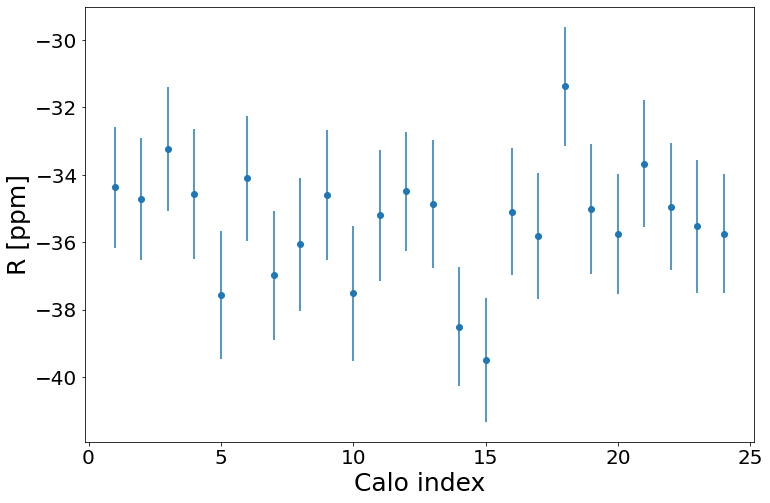

In [28]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval, yerr=drval, fmt="o")
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
#plt.savefig('run3btom_caloscan_R.jpg')

In [29]:
def fit_Rwave(x: np.double,
              amp: np.double = 0.0, 
              phase: np.double = 0.0, 
              offset: np.double = 0.0)-> np.double:
    
    Romega=0.2618
    
    return amp*sin(Romega*x+phase)+offset

p_0=[1.0,1.5,-35]

rwave_p, rwave_cov = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval, p0=p_0, sigma=drval)

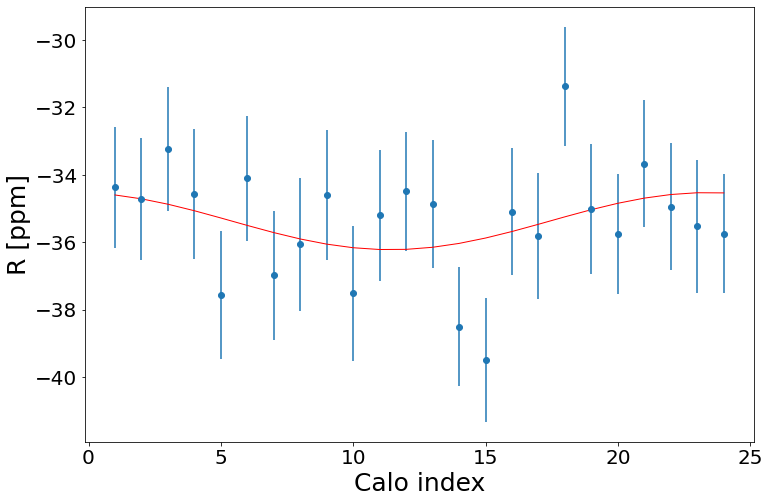

chi2/ndf= 18.11982576640005 /21
amplitude= 0.8474000398248235  phase= 1.7224793332007602  offset= -35.374526877545186


In [30]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval, yerr=drval, fmt="o")
plt.plot(calonum, fit_Rwave(calonum, *rwave_p), linestyle='solid', linewidth=1, color='red')
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
chi2_1=np.empty(24)
chi2_1=(fit_Rwave(calonum, *rwave_p)-rval)*(fit_Rwave(calonum, *rwave_p)-rval)/(drval*drval)
print('chi2/ndf=',sum(chi2_1),'/21')
print('amplitude=',rwave_p[0],' phase=',rwave_p[1],' offset=',rwave_p[2])
#plt.savefig('run3btom_caloscan_Rfit_sine.jpg')

In [31]:
def fit_straight(x: np.double, 
                 offset: np.double = 0.0)-> np.double:
    
    return offset+0*x

p2_0=[-35]

rwave2_p, rwave2_cov = opt.curve_fit(f=fit_straight, xdata=calonum, ydata=rval, p0=p2_0, sigma=drval)

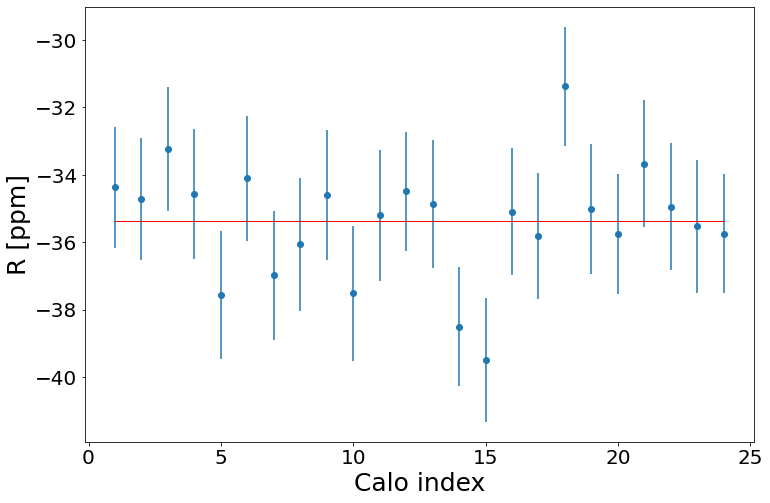

chi2/ndf= 20.59434879575962 /23
offset= -35.364854886839765


In [32]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval, yerr=drval, fmt="o")
plt.plot(calonum, fit_straight(calonum, *rwave2_p), linestyle='solid', linewidth=1, color='red')
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
chi2_2=np.empty(24)
chi2_2=(fit_straight(calonum, *rwave2_p)-rval)*(fit_straight(calonum, *rwave2_p)-rval)/(drval*drval)
print('chi2/ndf=',sum(chi2_2),'/23')
print('offset=',rwave2_p[0])
#plt.savefig('run3btom_caloscan_Rfit_straight.jpg')

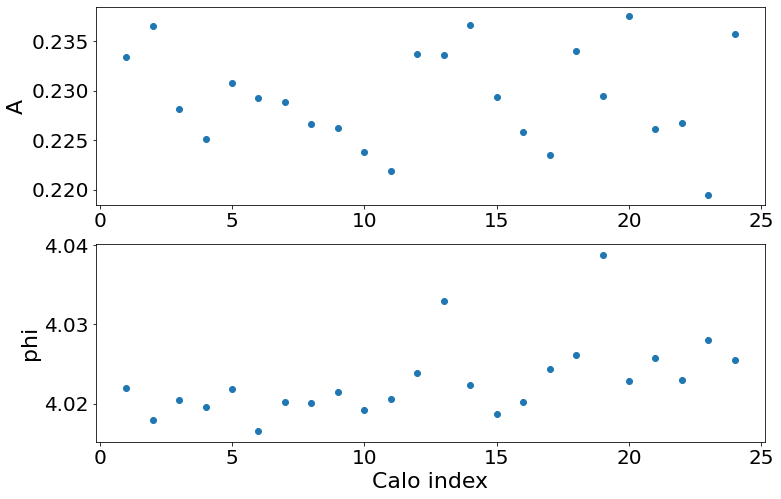

In [33]:
plt.figure(figsize=(12,8))
# fist line:
plt.subplot(211)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, asym, yerr=dasym, fmt="o")
plt.ylabel('A',fontsize=22)
 
# second line
plt.subplot(212)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, phi, yerr=dphi, fmt="o")
plt.xlabel('Calo index',fontsize=22)
plt.ylabel('phi',fontsize=22)

plt.show()
#plt.savefig('run3btom_caloscan_A_phi.jpg')

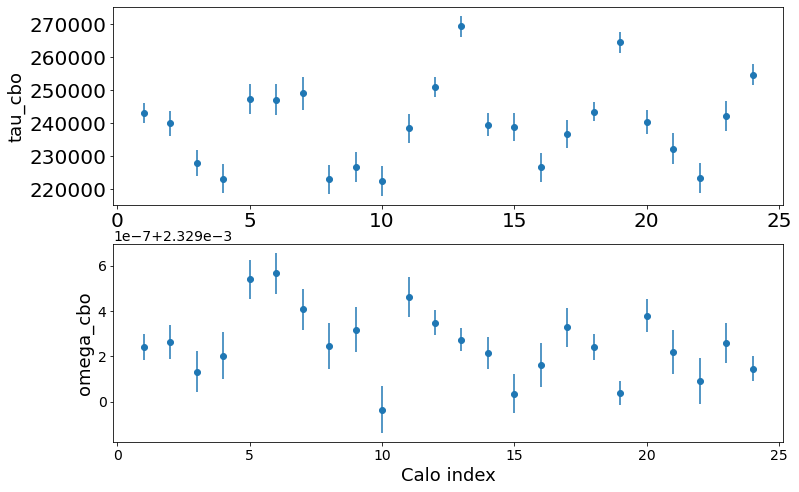

In [34]:
plt.figure(figsize=(12,8))
# fist line:
plt.subplot(211)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, tau_cbo, yerr=dtau_cbo, fmt="o")
plt.ylabel('tau_cbo',fontsize=18)
 
# second line
plt.subplot(212)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, omega_cbo, yerr=domega_cbo, fmt="o")
plt.xlabel('Calo index',fontsize=18)
plt.ylabel('omega_cbo',fontsize=18)

plt.show()
#plt.savefig('run3btom_caloscan_tau_omega_cbo.jpg')

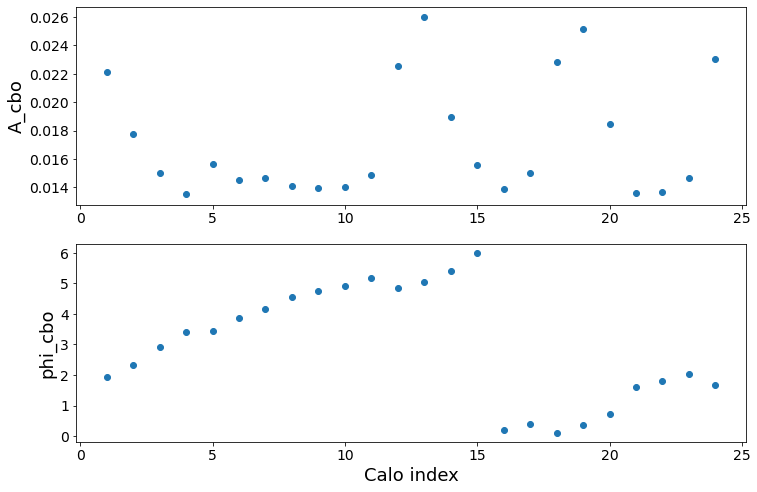

In [35]:
plt.figure(figsize=(12,8))
# fist line:
plt.subplot(211)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, A_cbo, yerr=dA_cbo, fmt="o")
plt.ylabel('A_cbo',fontsize=18)

for icalo in range(0,24):
    if phi_cbo[icalo]>6.28:
        phi_cbo[icalo]=phi_cbo[icalo]-6.28

# second line
plt.subplot(212)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, phi_cbo, yerr=dphi_cbo, fmt="o")
plt.xlabel('Calo index',fontsize=18)
plt.ylabel('phi_cbo',fontsize=18)

plt.show()
#plt.savefig('run3btom_caloscan_A_phi_cbo.jpg')

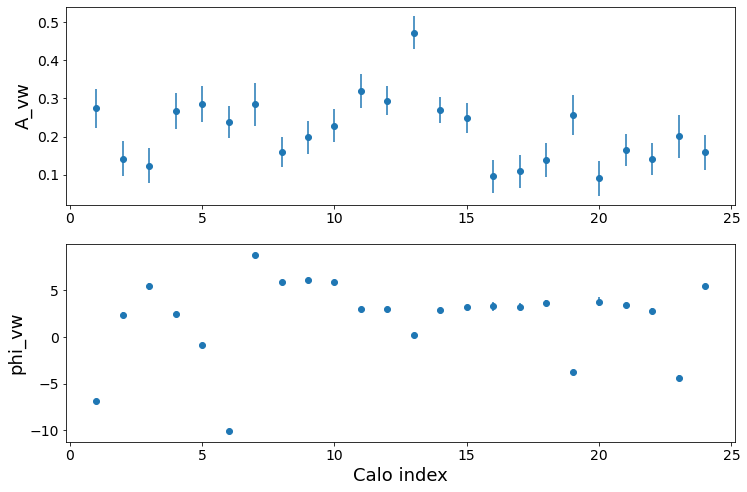

In [36]:
plt.figure(figsize=(12,8))
# fist line:
plt.subplot(211)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, np.abs(A_vw), yerr=dA_vw, fmt="o")
plt.ylabel('A_vw',fontsize=18)

for icalo in range(0,24):
    if phi_vw[icalo]>6.28:
        phi_vw[icalo]=phi_vw[icalo]-6.28

# second line
plt.subplot(212)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, phi_vw, yerr=dphi_vw, fmt="o")
plt.xlabel('Calo index',fontsize=18)
plt.ylabel('phi_vw',fontsize=18)

plt.show()
#plt.savefig('run3btom_caloscan_A_phi_vw.jpg')

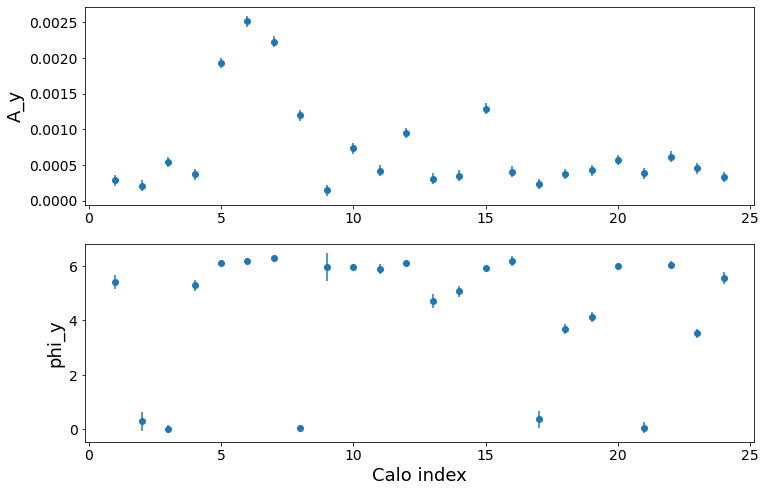

In [37]:
plt.figure(figsize=(12,8))
# fist line:
plt.subplot(211)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, np.abs(A_y), yerr=dA_y, fmt="o")
plt.ylabel('A_y',fontsize=18)

for icalo in range(0,24):
    if phi_y[icalo]>6.28:
        phi_y[icalo]=phi_y[icalo]-6.28

# second line
plt.subplot(212)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, phi_y, yerr=dphi_y, fmt="o")
plt.xlabel('Calo index',fontsize=18)
plt.ylabel('phi_y',fontsize=18)

plt.show()
#plt.savefig('run3btom_caloscan_A_phi_y.jpg')

In [38]:
rval

array([-34.36381966, -34.7111066 , -33.24338222, -34.56808987,
       -37.57216274, -34.10865682, -36.98415033, -36.06447793,
       -34.60886594, -37.52120721, -35.19817699, -34.48787434,
       -34.86440959, -38.50144222, -39.49560557, -35.09304499,
       -35.82242319, -31.37237473, -35.02201094, -35.76053802,
       -33.66808079, -34.94191138, -35.52712427, -35.75046346])

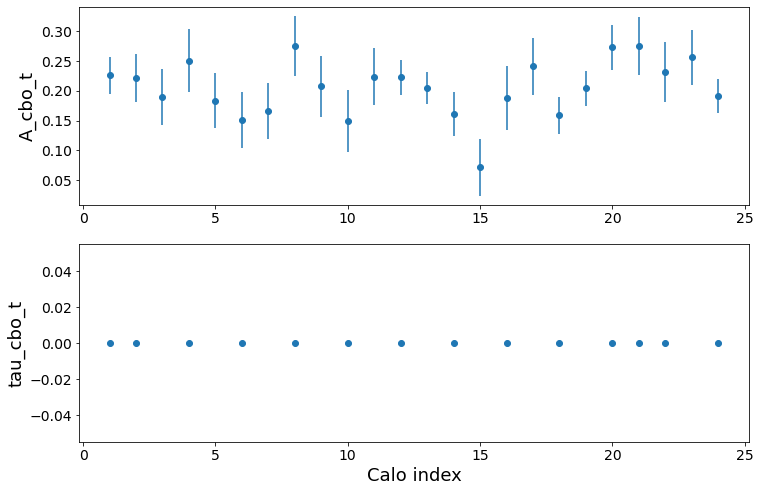

In [39]:
plt.figure(figsize=(12,8))
# fist line:
plt.subplot(211)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, A_cbo_t, yerr=dA_cbo_t, fmt="o")
plt.ylabel('A_cbo_t',fontsize=18)
#plt.ylim(-0.5,0.5)


# second line
plt.subplot(212)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, tau_cbo_t, yerr=dtau_cbo_t, fmt="o")
plt.xlabel('Calo index',fontsize=18)
plt.ylabel('tau_cbo_t',fontsize=18)
#plt.ylim(0,2000)
plt.show()

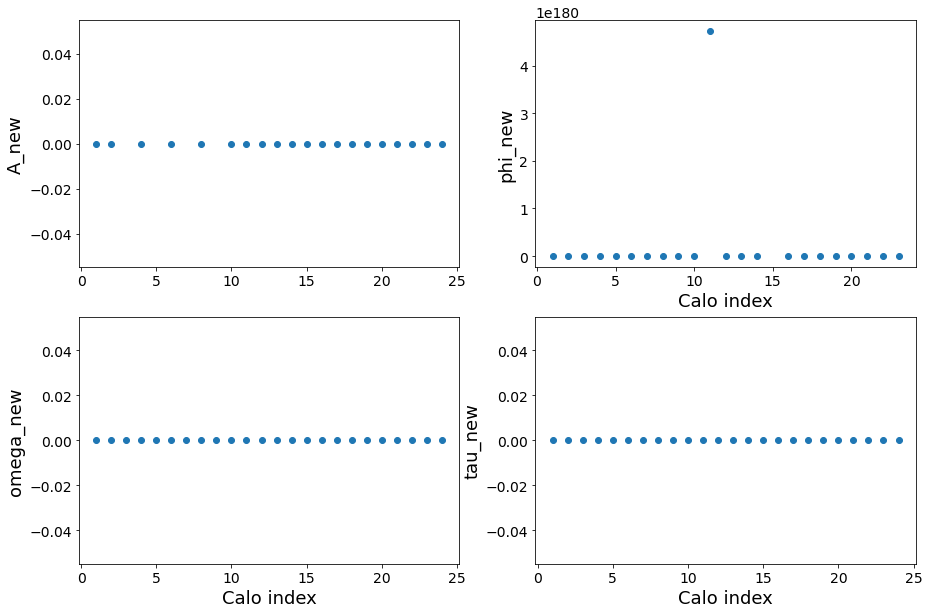

In [40]:
plt.figure(figsize=(15,10))
# fist line:
plt.subplot(221)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, A_new2, yerr=dA_new2, fmt="o")
plt.ylabel('A_new',fontsize=18)



# second line
plt.subplot(222)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, phi_new2, yerr=dphi_new2, fmt="o")
plt.xlabel('Calo index',fontsize=18)
plt.ylabel('phi_new',fontsize=18)

plt.subplot(223)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, omega_new2, yerr=domega_new2, fmt="o")
plt.xlabel('Calo index',fontsize=18)
plt.ylabel('omega_new',fontsize=18)

plt.subplot(224)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, tau_new2, yerr=dtau_new2, fmt="o")
plt.xlabel('Calo index',fontsize=18)
plt.ylabel('tau_new',fontsize=18)


plt.show()